In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

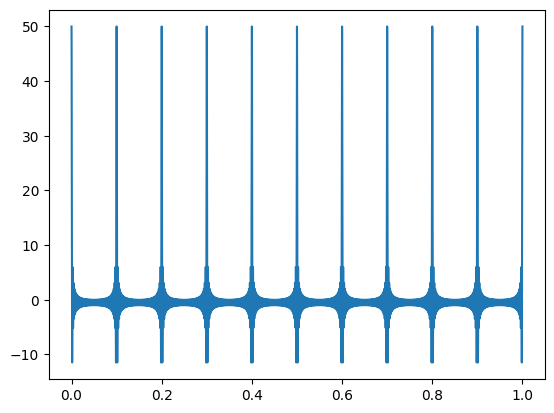

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:3413: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

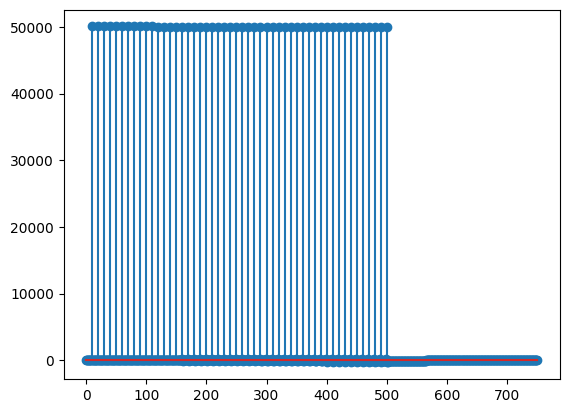

In [3]:
T = np.linspace(0, 1, 100000)

def signal_generator(f_0: int = 10, f_f: int= 500, step: int = 10, t: np.ndarray = T):
  f = np.zeros(t.shape)
  for freq in range(f_0, f_f+1, step):
    f += np.cos(2 * np.pi * freq * t)
  return f

def plotable_fft(f: np.ndarray, t: np.ndarray = T, max_freq=500):
  N = len(t)
  T = t[1] - t[0]
  frqStep = 1/(T*N)
  max_index = int(1.5*max_freq//frqStep) + 1
  if max_freq > N*frqStep/2 or max_index > N//2:
    max_index = N//2
  return fft.fftfreq(N, T)[:max_index], fft.fft(f)[:max_index]

f = signal_generator()
plt.plot(T,f)
plt.show()
plt.stem(*plotable_fft(f))

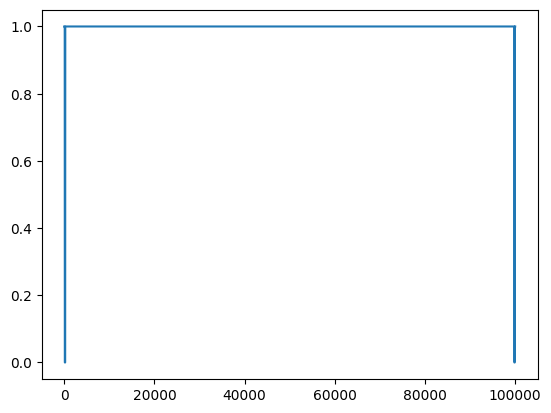

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


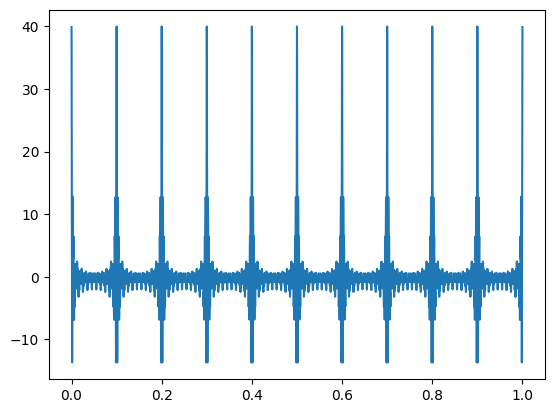

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:3413: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


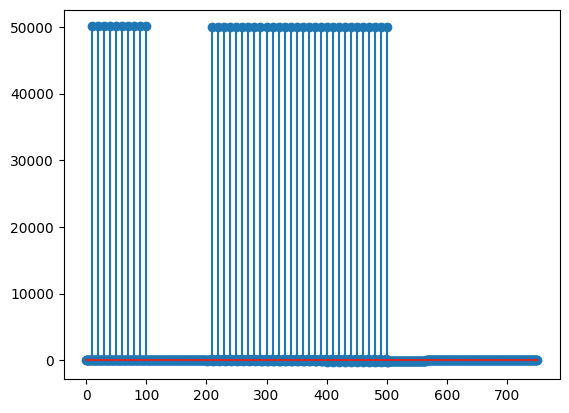

In [41]:
def filter_bandpass(f_0, f_f, t=T):
  N = len(t)
  T = t[1] - t[0]
  freqs = fft.fftfreq(N, T)
  return np.where((np.abs(freqs) >= f_0) & (np.abs(freqs) < f_f), 1, 0)

def filter_bandstop(f_0, f_f, t=T):
  N = len(t)
  T = t[1] - t[0]
  freqs = fft.fftfreq(N, T)
  return np.where((np.abs(freqs) >= f_0) & (np.abs(freqs) < f_f), 0, 1)

def pass_for_filter(f, filter):
  return fft.ifft(fft.fft(f)*filter)

filt = filter_bandstop(100, 200)
plt.plot(filt)
plt.show()
filtered = pass_for_filter(f, filt)
plt.plot(T, filtered)
plt.show()
plt.stem(*plotable_fft(filtered))
plt.show()

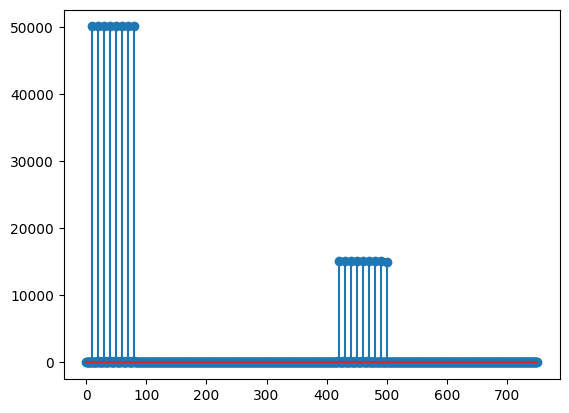

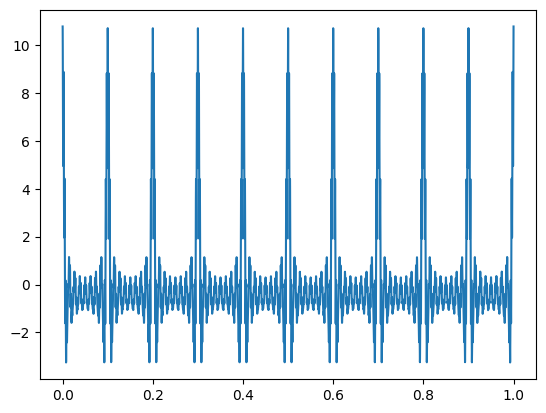

In [88]:
class Equalizer:
  def __init__(self, signal: np.ndarray):
    self.signal = signal

  def apply(self, weights: list[float] = [1,1,1,1,1,1,1], t: np.ndarray = T, f_min=0, f_max=0):
    N = len(t)
    T = t[1] - t[0]
    abs_freqs = np.abs(fft.fftfreq(N, T))
    max_freq = f_max if f_max else np.max(abs_freqs)+1


    W = np.zeros(abs_freqs.shape)
    increment = max_freq/len(weights)
    for i, w in enumerate(weights):
      W += np.where((abs_freqs >= i*increment) & (abs_freqs < (i+1)*increment), w, 0)

    return pass_for_filter(self.signal, W)


eq = Equalizer(f)
equalized_signal = eq.apply([1.0,0,0.0,0,0.0,0.3], f_max=500)
plt.stem(*plotable_fft(equalized_signal))
plt.show()
plt.plot(T, equalized_signal)
plt.show()